<a href="https://colab.research.google.com/github/Rutuja0799/TSF-Tasks/blob/main/GRIP_Task(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RUTUJA JADHAV**

#**Simple** **Linear** **Regression**

**Task1 - Prediction using Supervised Machine Learning**

**To Build the Simple Linear Regression model and predict the percentage of marks of the students based on the number of hours they studied.**

# Importing the libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [ ]:
#Data can be found at: "http://bit.ly/w-data"
Scores = pd.read_csv("Students_Scores.csv")

In [ ]:
Scores

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Checking if any values are missing 

In [ ]:
Scores.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Describing the data


In [ ]:
Scores.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
Scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Visualising the data and looking for the presence of correlation

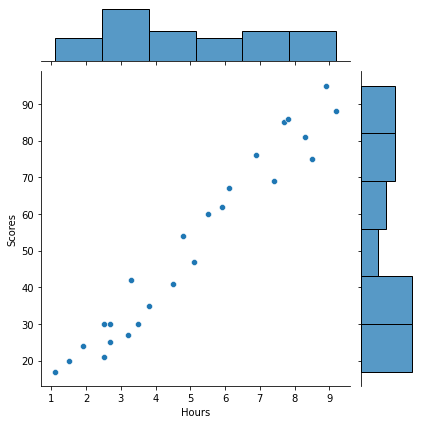

In [ ]:
sns.jointplot(x = 'Hours',y = 'Scores',data = Scores)

**from the above jointplot we can see that there is positive correlation between number of hours studied and marks scored by students as with the increase in number of hours studied, marks scored are increasing too and we can also see that maximum students study for 2.5 to 3.8 hours (approx) and maximum students score between 17 1nd 43 (approx)**

In [ ]:
Corr = Scores.corr()

In [ ]:
Corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


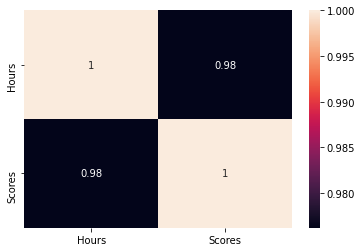

In [ ]:
sns.heatmap(data = Corr , annot = True)

In [ ]:
X = Scores.iloc[:,0].values
y = Scores.iloc[:,-1].values

In [ ]:
X

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8])

In [ ]:
X = X.reshape(len(X),1)

In [ ]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

# Splitting the data into training set and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [ ]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [ ]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [ ]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41])

In [ ]:
y_test

array([20, 27, 69, 30, 62])

# Training the Simple Linear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Predicting the Test set Results

In [ ]:
y_pred = regressor.predict(X_test)


In [ ]:
y_pred = np.round(y_pred,2)

In [ ]:
y_pred

array([16.88, 33.73, 75.36, 26.79, 60.49])

In [ ]:
df = pd.DataFrame({"ytest":y_test,"ypred":y_pred})

In [ ]:
df

,ytest,ypred
0,20,16.88
1,27,33.73
2,69,75.36
3,30,26.79
4,62,60.49


# Predicting score if a student studies for 9.25hrs/day

In [ ]:
y_pred1 = np.round(regressor.predict([[9.25]]),2)

In [ ]:
y_pred1 

array([93.69])

**We predicted that if a student studies for 9.25 hours he would end up scoring 95.23%**

# Visualising the Training set results

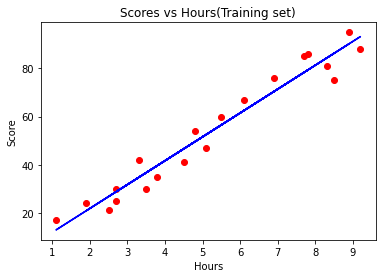

In [ ]:
plt.scatter(X_train,y_train,color = 'red')
plt.plot(X_train,regressor.predict(X_train),color = 'blue')
plt.xlabel("Hours")
plt.ylabel("Score")
plt.title("Scores vs Hours(Training set)")
plt.show()

# Visualising the Test set results

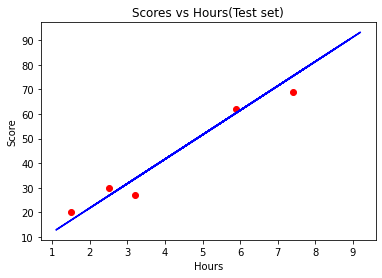

In [ ]:
plt.scatter(X_test,y_test,color = 'red')
plt.plot(X_train,regressor.predict(X_train),color = 'blue')
plt.xlabel("Hours")
plt.ylabel("Score")
plt.title("Scores vs Hours(Test set)")
plt.show()

# Model Evaluation


In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error
R2 = r2_score(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)


In [ ]:
print("R2:",R2)

R2: 0.9454567433878458


In [ ]:
print("MeanAbsoluteError:",MAE)

MeanAbsoluteError: 4.185999999999999
